In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.5
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, 50, 0.5, array([1., 1.]))


In [5]:
import getxyuvtwoellipse_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqellipse=getxyuvtwoellipse_apper.getxyuveqtwoellipses(initdateqellipse,useperihelion)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.14159265 0.        ] 0.5 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaeqellipse
delta=0.01
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0
[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0


In [12]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [13]:
import timestepAdaptive

In [20]:
numsteps=10000

#numsteps=6000*10
dt=0.01
dtmax=1.0
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,xyuvaeqellipse,outputevery,delta)

False 0.011472011610366718 0.01 0.01 1.7320415711931891
False 0.013160705043429236 0.011472011610366718 0.021472011610366718 1.7320415736096835
False 0.01509797612089914 0.013160705043429236 0.034632716653795956 1.732041578083711
False 0.01732041577085657 0.01509797612089914 0.04973069277469509 1.7320415854560414
False 0.019870001155580512 0.01732041577085657 0.06705110854555166 1.7320415968612173
False 0.022794888535746613 0.019870001155580512 0.08692110970113218 1.7320416138245363
False 0.026150322847545083 0.022794888535746613 0.10971599823687879 1.7320416383902895
False 0.029999681174282682 0.026150322847545083 0.13586632108442387 1.732041673291238
False 0.034415669823856535 0.029999681174282682 0.16586600225870654 1.7320417221724385
False 0.039481697626056765 0.034415669823856535 0.2002816720825631 1.7320417898867444
False 0.04529345139401988 0.039481697626056765 0.23976336970861986 1.732041882884752
False 0.05196070331556283 0.04529345139401988 0.28505682110263975 1.7320420097292

False 1.0 1.0 138.1739921604323 1.815725454172338
False 1.0 1.0 139.1739921604323 1.816868535317278
False 1.0 1.0 140.1739921604323 1.818018052852301
False 1.0 1.0 141.1739921604323 1.8191739758381802
False 1.0 1.0 142.1739921604323 1.8203362733257504
False 1.0 1.0 143.1739921604323 1.8215049143589506
False 1.0 1.0 144.1739921604323 1.8226798679767375
False 1.0 1.0 145.1739921604323 1.8238611032163978
False 1.0 1.0 146.1739921604323 1.8250485891153863
False 1.0 1.0 147.1739921604323 1.8262422947141304
False 1.0 1.0 148.1739921604323 1.827442189058404
False 1.0 1.0 149.1739921604323 1.8286482412018434
False 1.0 1.0 150.1739921604323 1.8298604202081574
False 1.0 1.0 151.1739921604323 1.8310786951535922
False 1.0 1.0 152.1739921604323 1.832303035129211
False 1.0 1.0 153.1739921604323 1.8335334092433906
False 1.0 1.0 154.1739921604323 1.8347697866238264
False 1.0 1.0 155.1739921604323 1.836012136419891
False 1.0 1.0 156.1739921604323 1.8372604278049554
False 1.0 1.0 157.1739921604323 1.838

False 1.0 1.0 302.1739921604323 2.068321290581715
False 1.0 1.0 303.1739921604323 2.070148900333864
False 1.0 1.0 304.1739921604323 2.0719788287707233
False 1.0 1.0 305.1739921604323 2.073811059424824
False 1.0 1.0 306.1739921604323 2.075645575932095
False 1.0 1.0 307.1739921604323 2.0774823620308105
False 1.0 1.0 308.1739921604323 2.07932140156179
False 1.0 1.0 309.1739921604323 2.081162678467589
False 1.0 1.0 310.1739921604323 2.0830061767921997
False 1.0 1.0 311.1739921604323 2.084851880680753
False 1.0 1.0 312.1739921604323 2.0866997743788835
False 1.0 1.0 313.1739921604323 2.0885498422326045
False 1.0 1.0 314.1739921604323 2.090402068687534
False 1.0 1.0 315.1739921604323 2.092256438288769
False 1.0 1.0 316.1739921604323 2.0941129356803936
False 1.0 1.0 317.1739921604323 2.0959715456048746
False 1.0 1.0 318.1739921604323 2.0978322529030136
False 1.0 1.0 319.1739921604323 2.0996950425129204
False 1.0 1.0 320.1739921604323 2.1015598994702542
False 1.0 1.0 321.1739921604323 2.1034268

False 1.0 1.0 465.1739921604323 2.3876952720992164
False 1.0 1.0 466.1739921604323 2.3897440664454703
False 1.0 1.0 467.1739921604323 2.3917935481819486
False 1.0 1.0 468.1739921604323 2.3938437120123353
False 1.0 1.0 469.1739921604323 2.3958945526782336
False 1.0 1.0 470.1739921604323 2.3979460649590534
False 1.0 1.0 471.1739921604323 2.3999982436719223
False 1.0 1.0 472.1739921604323 2.4020510836710223
False 1.0 1.0 473.1739921604323 2.404104579847309
False 1.0 1.0 474.1739921604323 2.406158727129024
False 1.0 1.0 475.1739921604323 2.408213520480188
False 1.0 1.0 476.1739921604323 2.4102689549013294
False 1.0 1.0 477.1739921604323 2.4123250254287942
False 1.0 1.0 478.1739921604323 2.4143817271346055
False 1.0 1.0 479.1739921604323 2.416439055125917
False 1.0 1.0 480.1739921604323 2.418497004545205
False 1.0 1.0 481.1739921604323 2.420555570569578
False 1.0 1.0 482.1739921604323 2.422614748410984
False 1.0 1.0 483.1739921604323 2.424674533315325
False 1.0 1.0 484.1739921604323 2.42673

False 1.0 1.0 787.1739921604324 3.064706548244018
False 1.0 1.0 788.1739921604324 3.0668273701974385
False 1.0 1.0 789.1739921604324 3.068948159647879
False 1.0 1.0 790.1739921604324 3.071068915587653
False 1.0 1.0 791.1739921604324 3.073189637010816
False 1.0 1.0 792.1739921604324 3.0753103229118506
False 1.0 1.0 793.1739921604324 3.077430972286723
False 1.0 1.0 794.1739921604324 3.079551584131989
False 1.0 1.0 795.1739921604324 3.0816721574456167
False 1.0 1.0 796.1739921604324 3.0837926912261655
False 1.0 1.0 797.1739921604324 3.0859131844731813
False 1.0 1.0 798.1739921604324 3.0880336361873173
False 1.0 1.0 799.1739921604324 3.0901540453697303
False 1.0 1.0 800.1739921604324 3.0922744110228573
False 1.0 1.0 801.1739921604324 3.094394732149315
False 1.0 1.0 802.1739921604324 3.096515007752984
False 1.0 1.0 803.1739921604324 3.098635236837885
False 1.0 1.0 804.1739921604324 3.1007554184098325
False 1.0 1.0 805.1739921604324 3.10287555147408
False 1.0 1.0 806.1739921604324 3.10499563

False 1.0 1.0 1108.1739921604324 3.7381336972964037
False 1.0 1.0 1109.1739921604324 3.7401884116428743
False 1.0 1.0 1110.1739921604324 3.7422427105248257
False 1.0 1.0 1111.1739921604324 3.744296592321155
False 1.0 1.0 1112.1739921604324 3.7463500554072584
False 1.0 1.0 1113.1739921604324 3.7484030981542396
False 1.0 1.0 1114.1739921604324 3.7504557189300094
False 1.0 1.0 1115.1739921604324 3.7525079160987906
False 1.0 1.0 1116.1739921604324 3.7545596880201852
False 1.0 1.0 1117.1739921604324 3.7566110330522657
False 1.0 1.0 1118.1739921604324 3.7586619495481686
False 1.0 1.0 1119.1739921604324 3.7607124358570663
False 1.0 1.0 1120.1739921604324 3.7627624903245445
False 1.0 1.0 1121.1739921604324 3.7648121112929624
False 1.0 1.0 1122.1739921604324 3.7668612971012583
False 1.0 1.0 1123.1739921604324 3.7689100460835117
False 1.0 1.0 1124.1739921604324 3.770958356571424
False 1.0 1.0 1125.1739921604324 3.7730062268923166
False 1.0 1.0 1126.1739921604324 3.7750536553696787
False 1.0 1.0 

False 1.0 1.0 1272.1739921604324 4.068274051182972
False 1.0 1.0 1273.1739921604324 4.070236218056819
False 1.0 1.0 1274.1739921604324 4.072197652259008
False 1.0 1.0 1275.1739921604324 4.074158351529391
False 1.0 1.0 1276.1739921604324 4.076118313601454
False 1.0 1.0 1277.1739921604324 4.078077536205369
False 1.0 1.0 1278.1739921604324 4.080036017067265
False 1.0 1.0 1279.1739921604324 4.081993753909623
False 1.0 1.0 1280.1739921604324 4.083950744450698
False 1.0 1.0 1281.1739921604324 4.085906986404208
False 1.0 1.0 1282.1739921604324 4.087862477480078
False 1.0 1.0 1283.1739921604324 4.089817215385665
False 1.0 1.0 1284.1739921604324 4.091771197821943
False 1.0 1.0 1285.1739921604324 4.093724422487435
False 1.0 1.0 1286.1739921604324 4.0956768870759666
False 1.0 1.0 1287.1739921604324 4.097628589278287
False 1.0 1.0 1288.1739921604324 4.099579526780446
False 1.0 1.0 1289.1739921604324 4.101529697263836
False 1.0 1.0 1290.1739921604324 4.103479098407319
False 1.0 1.0 1291.17399216043

False 1.0 1.0 1437.1739921604324 4.380338052699683
False 1.0 1.0 1438.1739921604324 4.382145836953229
False 1.0 1.0 1439.1739921604324 4.38395246281364
False 1.0 1.0 1440.1739921604324 4.385757927398987
False 1.0 1.0 1441.1739921604324 4.387562227823985
False 1.0 1.0 1442.1739921604324 4.389365361198582
False 1.0 1.0 1443.1739921604324 4.391167324630461
False 1.0 1.0 1444.1739921604324 4.392968115224292
False 1.0 1.0 1445.1739921604324 4.394767730080641
False 1.0 1.0 1446.1739921604324 4.3965661662974584
False 1.0 1.0 1447.1739921604324 4.39836342096943
False 1.0 1.0 1448.1739921604324 4.400159491187705
False 1.0 1.0 1449.1739921604324 4.401954374040598
False 1.0 1.0 1450.1739921604324 4.403748066612516
False 1.0 1.0 1451.1739921604324 4.405540565985061
False 1.0 1.0 1452.1739921604324 4.407331869237496
False 1.0 1.0 1453.1739921604324 4.409121973444072
False 1.0 1.0 1454.1739921604324 4.410910875677244
False 1.0 1.0 1455.1739921604324 4.412698573006143
False 1.0 1.0 1456.1739921604324

False 1.0 1.0 1599.1739921604324 4.656005123226012
False 1.0 1.0 1600.1739921604324 4.657585644642298
False 1.0 1.0 1601.1739921604324 4.659164505066736
False 1.0 1.0 1602.1739921604324 4.660741701228067
False 1.0 1.0 1603.1739921604324 4.662317229857547
False 1.0 1.0 1604.1739921604324 4.663891087683403
False 1.0 1.0 1605.1739921604324 4.665463271432099
False 1.0 1.0 1606.1739921604324 4.667033777829524
False 1.0 1.0 1607.1739921604324 4.668602603601646
False 1.0 1.0 1608.1739921604324 4.670169745470982
False 1.0 1.0 1609.1739921604324 4.671735200161425
False 1.0 1.0 1610.1739921604324 4.67329896439291
False 1.0 1.0 1611.1739921604324 4.674861034886541
False 1.0 1.0 1612.1739921604324 4.676421408361048
False 1.0 1.0 1613.1739921604324 4.6779800815349075
False 1.0 1.0 1614.1739921604324 4.679537051125819
False 1.0 1.0 1615.1739921604324 4.681092313848945
False 1.0 1.0 1616.1739921604324 4.682645866421125
False 1.0 1.0 1617.1739921604324 4.684197705554679
False 1.0 1.0 1618.173992160432

False 1.0 1.0 1761.1739921604324 4.888096806893875
False 1.0 1.0 1762.1739921604324 4.889365272517413
False 1.0 1.0 1763.1739921604324 4.890631544694465
False 1.0 1.0 1764.1739921604324 4.891895620213341
False 1.0 1.0 1765.1739921604324 4.8931574958617
False 1.0 1.0 1766.1739921604324 4.894417168430734
False 1.0 1.0 1767.1739921604324 4.895674634714048
False 1.0 1.0 1768.1739921604324 4.896929891506639
False 1.0 1.0 1769.1739921604324 4.898182935608258
False 1.0 1.0 1770.1739921604324 4.89943376381592
False 1.0 1.0 1771.1739921604324 4.900682372932717
False 1.0 1.0 1772.1739921604324 4.901928759764669
False 1.0 1.0 1773.1739921604324 4.903172921117496
False 1.0 1.0 1774.1739921604324 4.904414853800089
False 1.0 1.0 1775.1739921604324 4.905654554624053
False 1.0 1.0 1776.1739921604324 4.906892020402702
False 1.0 1.0 1777.1739921604324 4.90812724795293
False 1.0 1.0 1778.1739921604324 4.909360234095626
False 1.0 1.0 1779.1739921604324 4.9105909756479855
False 1.0 1.0 1780.1739921604324 4

False 1.0 1.0 1925.1739921604324 5.06457246714583
False 1.0 1.0 1926.1739921604324 5.065440493258022
False 1.0 1.0 1927.1739921604324 5.0663058447857745
False 1.0 1.0 1928.1739921604324 5.067168519186565
False 1.0 1.0 1929.1739921604324 5.068028513926615
False 1.0 1.0 1930.1739921604324 5.068885826476643
False 1.0 1.0 1931.1739921604324 5.0697404543126305
False 1.0 1.0 1932.1739921604324 5.070592394918699
False 1.0 1.0 1933.1739921604324 5.071441645782795
False 1.0 1.0 1934.1739921604324 5.072288204401873
False 1.0 1.0 1935.1739921604324 5.073132068277071
False 1.0 1.0 1936.1739921604324 5.073973234916313
False 1.0 1.0 1937.1739921604324 5.074811701833567
False 1.0 1.0 1938.1739921604324 5.0756474665504605
False 1.0 1.0 1939.1739921604324 5.076480526592667
False 1.0 1.0 1940.1739921604324 5.077310879493578
False 1.0 1.0 1941.1739921604324 5.0781385227925675
False 1.0 1.0 1942.1739921604324 5.078963454036781
False 1.0 1.0 1943.1739921604324 5.079785670776633
False 1.0 1.0 1944.173992160

False 1.0 1.0 2089.173992160432 5.169543206542639
False 1.0 1.0 2090.173992160432 5.169943655972863
False 1.0 1.0 2091.173992160432 5.170341110738832
False 1.0 1.0 2092.173992160432 5.170735569571323
False 1.0 1.0 2093.173992160432 5.171127031210224
False 1.0 1.0 2094.173992160432 5.1715154944052575
False 1.0 1.0 2095.173992160432 5.171900957914612
False 1.0 1.0 2096.173992160432 5.1722834205058055
False 1.0 1.0 2097.173992160432 5.172662880956247
False 1.0 1.0 2098.173992160432 5.173039338051645
False 1.0 1.0 2099.173992160432 5.173412790587705
False 1.0 1.0 2100.173992160432 5.173783237368726
False 1.0 1.0 2101.173992160432 5.174150677208796
False 1.0 1.0 2102.173992160432 5.17451510893123
False 1.0 1.0 2103.173992160432 5.1748765313683185
False 1.0 1.0 2104.173992160432 5.1752349433625415
False 1.0 1.0 2105.173992160432 5.175590343763821
False 1.0 1.0 2106.173992160432 5.175942731433737
False 1.0 1.0 2107.173992160432 5.176292105241256
False 1.0 1.0 2108.173992160432 5.1766384640664

False 1.0 1.0 2411.173992160432 5.140974554211292
False 1.0 1.0 2412.173992160432 5.140398638177164
False 1.0 1.0 2413.173992160432 5.139819820702904
False 1.0 1.0 2414.173992160432 5.13923810359264
False 1.0 1.0 2415.173992160432 5.13865348866058
False 1.0 1.0 2416.173992160432 5.138065977726742
False 1.0 1.0 2417.173992160432 5.137475572619884
False 1.0 1.0 2418.173992160432 5.136882275178293
False 1.0 1.0 2419.173992160432 5.136286087246346
False 1.0 1.0 2420.173992160432 5.135687010677409
False 1.0 1.0 2421.173992160432 5.135085047334173
False 1.0 1.0 2422.173992160432 5.134480199086119
False 1.0 1.0 2423.173992160432 5.133872467809657
False 1.0 1.0 2424.173992160432 5.1332618553921865
False 1.0 1.0 2425.173992160432 5.132648363725903
False 1.0 1.0 2426.173992160432 5.132031994713565
False 1.0 1.0 2427.173992160432 5.1314127502652065
False 1.0 1.0 2428.173992160432 5.130790632297833
False 1.0 1.0 2429.173992160432 5.13016564273702
False 1.0 1.0 2430.173992160432 5.129537783516865
F

False 1.0 1.0 2736.173992160432 4.814403733684361
False 1.0 1.0 2737.173992160432 4.813016684171352
False 1.0 1.0 2738.173992160432 4.811627628652498
False 1.0 1.0 2739.173992160432 4.810236570420628
False 1.0 1.0 2740.173992160432 4.80884351277562
False 1.0 1.0 2741.173992160432 4.807448459016489
False 1.0 1.0 2742.173992160432 4.80605141244183
False 1.0 1.0 2743.173992160432 4.80465237635307
False 1.0 1.0 2744.173992160432 4.803251354049324
False 1.0 1.0 2745.173992160432 4.801848348832101
False 1.0 1.0 2746.173992160432 4.800443364005142
False 1.0 1.0 2747.173992160432 4.799036402869076
False 1.0 1.0 2748.173992160432 4.797627468730442
False 1.0 1.0 2749.173992160432 4.7962165648896145
False 1.0 1.0 2750.173992160432 4.7948036946529715
False 1.0 1.0 2751.173992160432 4.79338886132525
False 1.0 1.0 2752.173992160432 4.79197206821149
False 1.0 1.0 2753.173992160432 4.790553318618833
False 1.0 1.0 2754.173992160432 4.789132615852596
False 1.0 1.0 2755.173992160432 4.787709963220304
Fal

False 1.0 1.0 3060.173992160432 4.278340247306598
False 1.0 1.0 3061.173992160432 4.276471623289583
False 1.0 1.0 3062.173992160432 4.274602000743831
False 1.0 1.0 3063.173992160432 4.272731382346814
False 1.0 1.0 3064.173992160432 4.270859770770303
False 1.0 1.0 3065.173992160432 4.268987168686505
False 1.0 1.0 3066.173992160432 4.267113578760369
False 1.0 1.0 3067.173992160432 4.265239003654493
False 1.0 1.0 3068.173992160432 4.263363446027539
False 1.0 1.0 3069.173992160432 4.261486908534558
False 1.0 1.0 3070.173992160432 4.259609393826546
False 1.0 1.0 3071.173992160432 4.257730904551439
False 1.0 1.0 3072.173992160432 4.255851443352514
False 1.0 1.0 3073.173992160432 4.253971012869796
False 1.0 1.0 3074.173992160432 4.252089615739964
False 1.0 1.0 3075.173992160432 4.2502072545961775
False 1.0 1.0 3076.173992160432 4.248323932065234
False 1.0 1.0 3077.173992160432 4.246439650773269
False 1.0 1.0 3078.173992160432 4.244554413341754
False 1.0 1.0 3079.173992160432 4.242668222388186

False 1.0 1.0 3381.173992160432 3.640158612500627
False 1.0 1.0 3382.173992160432 3.6380856343149546
False 1.0 1.0 3383.173992160432 3.636012316455186
False 1.0 1.0 3384.173992160432 3.633938660368416
False 1.0 1.0 3385.173992160432 3.6318646674960395
False 1.0 1.0 3386.173992160432 3.6297903392774837
False 1.0 1.0 3387.173992160432 3.6277156771494257
False 1.0 1.0 3388.173992160432 3.6256406825433416
False 1.0 1.0 3389.173992160432 3.6235653568896127
False 1.0 1.0 3390.173992160432 3.621489701614238
False 1.0 1.0 3391.173992160432 3.619413718139884
False 1.0 1.0 3392.173992160432 3.6173374078863514
False 1.0 1.0 3393.173992160432 3.6152607722695205
False 1.0 1.0 3394.173992160432 3.613183812703667
False 1.0 1.0 3395.173992160432 3.6111065305979864
False 1.0 1.0 3396.173992160432 3.6090289273590717
False 1.0 1.0 3397.173992160432 3.6069510043906448
False 1.0 1.0 3398.173992160432 3.604872763092832
False 1.0 1.0 3399.173992160432 3.60279420486285
False 1.0 1.0 3400.173992160432 3.600715

False 1.0 1.0 3544.173992160432 3.2987169626907753
False 1.0 1.0 3545.173992160432 3.296605615124446
False 1.0 1.0 3546.173992160432 3.2944941264552376
False 1.0 1.0 3547.173992160432 3.2923824977217744
False 1.0 1.0 3548.173992160432 3.290270729961039
False 1.0 1.0 3549.173992160432 3.2881588242095257
False 1.0 1.0 3550.173992160432 3.2860467815008
False 1.0 1.0 3551.173992160432 3.283934602868154
False 1.0 1.0 3552.173992160432 3.2818222893429265
False 1.0 1.0 3553.173992160432 3.279709841955907
False 1.0 1.0 3554.173992160432 3.2775972617357167
False 1.0 1.0 3555.173992160432 3.2754845497100775
False 1.0 1.0 3556.173992160432 3.273371706905278
False 1.0 1.0 3557.173992160432 3.2712587343469433
False 1.0 1.0 3558.173992160432 3.2691456330584905
False 1.0 1.0 3559.173992160432 3.2670324040622822
False 1.0 1.0 3560.173992160432 3.2649190483807704
False 1.0 1.0 3561.173992160432 3.26280556703361
False 1.0 1.0 3562.173992160432 3.2606919610393894
False 1.0 1.0 3563.173992160432 3.2585782

False 1.0 1.0 3708.173992160432 2.9512970643187177
False 1.0 1.0 3709.173992160432 2.9491760389807014
False 1.0 1.0 3710.173992160432 2.9470550397849964
False 1.0 1.0 3711.173992160432 2.9449340678600016
False 1.0 1.0 3712.173992160432 2.942813124336948
False 1.0 1.0 3713.173992160432 2.940692210350348
False 1.0 1.0 3714.173992160432 2.9385713270386975
False 1.0 1.0 3715.173992160432 2.936450475543255
False 1.0 1.0 3716.173992160432 2.934329657009289
False 1.0 1.0 3717.173992160432 2.932208872585381
False 1.0 1.0 3718.173992160432 2.930088123423776
False 1.0 1.0 3719.173992160432 2.9279674106804543
False 1.0 1.0 3720.173992160432 2.9258467355148308
False 1.0 1.0 3721.173992160432 2.9237260990902394
False 1.0 1.0 3722.173992160432 2.9216055025737826
False 1.0 1.0 3723.173992160432 2.9194849471366227
False 1.0 1.0 3724.173992160432 2.9173644339532783
False 1.0 1.0 3725.173992160432 2.9152439642026216
False 1.0 1.0 3726.173992160432 2.9131235390673687
False 1.0 1.0 3727.173992160432 2.911

False 1.0 1.0 4029.173992160432 2.2813187556289276
False 1.0 1.0 4030.173992160432 2.279315563563858
False 1.0 1.0 4031.173992160432 2.2773134135785695
False 1.0 1.0 4032.173992160432 2.2753123135748425
False 1.0 1.0 4033.173992160432 2.2733122715106764
False 1.0 1.0 4034.173992160432 2.2713132954017454
False 1.0 1.0 4035.173992160432 2.269315393321013
False 1.0 1.0 4036.173992160432 2.26731857339967
False 1.0 1.0 4037.173992160432 2.2653228438273016
False 1.0 1.0 4038.173992160432 2.2633282128520045
False 1.0 1.0 4039.173992160432 2.2613346887813055
False 1.0 1.0 4040.173992160432 2.2593422799822385
False 1.0 1.0 4041.173992160432 2.2573509948817874
False 1.0 1.0 4042.173992160432 2.2553608419671978
False 1.0 1.0 4043.173992160432 2.253371829786598
False 1.0 1.0 4044.173992160432 2.251383966949329
False 1.0 1.0 4045.173992160432 2.2493972621260663
False 1.0 1.0 4046.173992160432 2.2474117240496096
False 1.0 1.0 4047.173992160432 2.2454273615151776
False 1.0 1.0 4048.173992160432 2.243

False 1.0 1.0 4192.173992160432 1.9761447870851716
False 1.0 1.0 4193.173992160432 1.974468028131977
False 1.0 1.0 4194.173992160432 1.9727946497852173
False 1.0 1.0 4195.173992160432 1.9711246746940596
False 1.0 1.0 4196.173992160432 1.9694581256232861
False 1.0 1.0 4197.173992160432 1.9677950254534355
False 1.0 1.0 4198.173992160432 1.9661353971805842
False 1.0 1.0 4199.173992160432 1.9644792639163668
False 1.0 1.0 4200.173992160432 1.9628266488878023
False 1.0 1.0 4201.173992160432 1.961177575437385
False 1.0 1.0 4202.173992160432 1.9595320670227712
False 1.0 1.0 4203.173992160432 1.9578901472166104
False 1.0 1.0 4204.173992160432 1.9562518397067348
False 1.0 1.0 4205.173992160432 1.9546171682954514
False 1.0 1.0 4206.173992160432 1.9529861569000333
False 1.0 1.0 4207.173992160432 1.9513588295519515
False 1.0 1.0 4208.173992160432 1.949735210396921
False 1.0 1.0 4209.173992160432 1.9481153236948308
False 1.0 1.0 4210.173992160432 1.946499193819182
False 1.0 1.0 4211.173992160432 1.9

False 1.0 1.0 4354.173992160432 1.767088415583506
False 1.0 1.0 4355.173992160432 1.766317181310703
False 1.0 1.0 4356.173992160432 1.7655539186393931
False 1.0 1.0 4357.173992160432 1.7647986536082874
False 1.0 1.0 4358.173992160432 1.764051412074686
False 1.0 1.0 4359.173992160432 1.763312219710808
False 1.0 1.0 4360.173992160432 1.7625811020004651
False 1.0 1.0 4361.173992160432 1.7618580842356744
False 1.0 1.0 4362.173992160432 1.7611431915132851
False 1.0 1.0 4363.173992160432 1.7604364487313913
False 1.0 1.0 4364.173992160432 1.7597378805861494
False 1.0 1.0 4365.173992160432 1.7590475115682547
False 1.0 1.0 4366.173992160432 1.7583653659596536
False 1.0 1.0 4367.173992160432 1.7576914678299833
False 1.0 1.0 4368.173992160432 1.7570258410334905
False 1.0 1.0 4369.173992160432 1.7563685092054888
False 1.0 1.0 4370.173992160432 1.7557194957590232
False 1.0 1.0 4371.173992160432 1.7550788238817394
False 1.0 1.0 4372.173992160432 1.7544465165322858
False 1.0 1.0 4373.173992160432 1.7

False 1.0 1.0 4666.173992160432 1.933047105029288
False 1.0 1.0 4667.173992160432 1.9346306286417763
False 1.0 1.0 4668.173992160432 1.936218118725194
False 1.0 1.0 4669.173992160432 1.9378095499600738
False 1.0 1.0 4670.173992160432 1.9394048971377826
False 1.0 1.0 4671.173992160432 1.9410041351615284
False 1.0 1.0 4672.173992160432 1.9426072390460607
False 1.0 1.0 4673.173992160432 1.9442141839185973
False 1.0 1.0 4674.173992160432 1.9458249450186822
False 1.0 1.0 4675.173992160432 1.9474394976987632
False 1.0 1.0 4676.173992160432 1.94905781742442
False 1.0 1.0 4677.173992160432 1.9506798797746252
False 1.0 1.0 4678.173992160432 1.9523056604420517
False 1.0 1.0 4679.173992160432 1.9539351352333347
False 1.0 1.0 4680.173992160432 1.9555682800690832
False 1.0 1.0 4681.173992160432 1.9572050709843245
False 1.0 1.0 4682.173992160432 1.9588454841286405
False 1.0 1.0 4683.173992160432 1.9604894957664667
False 1.0 1.0 4684.173992160432 1.9621370822768973
False 1.0 1.0 4685.173992160432 1.9

False 1.0 1.0 4830.173992160432 2.230745155060023
False 1.0 1.0 4831.173992160432 2.2327205167343633
False 1.0 1.0 4832.173992160432 2.2346971211799422
False 1.0 1.0 4833.173992160432 2.236674959126164
False 1.0 1.0 4834.173992160432 2.2386540213675863
False 1.0 1.0 4835.173992160432 2.2406342987641312
False 1.0 1.0 4836.173992160432 2.242615782240162
False 1.0 1.0 4837.173992160432 2.244598462783985
False 1.0 1.0 4838.173992160432 2.246582331448258
False 1.0 1.0 4839.173992160432 2.248567379348555
False 1.0 1.0 4840.173992160432 2.2505535976635227
False 1.0 1.0 4841.173992160432 2.252540977634167
False 1.0 1.0 4842.173992160432 2.2545295105641587
False 1.0 1.0 4843.173992160432 2.2565191878183897
False 1.0 1.0 4844.173992160432 2.258510000823347
False 1.0 1.0 4845.173992160432 2.260501941066216
False 1.0 1.0 4846.173992160432 2.2624950000949346
False 1.0 1.0 4847.173992160432 2.2644891695175646
False 1.0 1.0 4848.173992160432 2.26648444100174
False 1.0 1.0 4849.173992160432 2.26848080

False 1.0 1.0 4992.173992160432 2.561995837140322
False 1.0 1.0 4993.173992160432 2.5640870875022563
False 1.0 1.0 4994.173992160432 2.5661786891277454
False 1.0 1.0 4995.173992160432 2.5682706390937775
False 1.0 1.0 4996.173992160432 2.5703629344974757
False 1.0 1.0 4997.173992160432 2.5724555724553757
False 1.0 1.0 4998.173992160432 2.574548550103514
False 1.0 1.0 4999.173992160432 2.576641864597476
False 1.0 1.0 5000.173992160432 2.5787355131117335
False 1.0 1.0 5001.173992160432 2.580829492840077
False 1.0 1.0 5002.173992160432 2.582923800995044
False 1.0 1.0 5003.173992160432 2.585018434807908
False 1.0 1.0 5004.173992160432 2.5871133915286264
False 1.0 1.0 5005.173992160432 2.589208668425274
False 1.0 1.0 5006.173992160432 2.5913042627846816
False 1.0 1.0 5007.173992160432 2.5934001719112953
False 1.0 1.0 5008.173992160432 2.5954963931278683
False 1.0 1.0 5009.173992160432 2.5975929237747675
False 1.0 1.0 5010.173992160432 2.599689761210354
False 1.0 1.0 5011.173992160432 2.60178

False 1.0 1.0 5315.173992160432 3.245009668117174
False 1.0 1.0 5316.173992160432 3.2471241670167603
False 1.0 1.0 5317.173992160432 3.2492385487949655
False 1.0 1.0 5318.173992160432 3.25135281244037
False 1.0 1.0 5319.173992160432 3.2534669569418484
False 1.0 1.0 5320.173992160432 3.2555809812849215
False 1.0 1.0 5321.173992160432 3.2576948844562184
False 1.0 1.0 5322.173992160432 3.2598086654407283
False 1.0 1.0 5323.173992160432 3.2619223232216488
False 1.0 1.0 5324.173992160432 3.264035856781592
False 1.0 1.0 5325.173992160432 3.2661492651020763
False 1.0 1.0 5326.173992160432 3.2682625471630304
False 1.0 1.0 5327.173992160432 3.2703757019437845
False 1.0 1.0 5328.173992160432 3.2724887284218083
False 1.0 1.0 5329.173992160432 3.2746016255746726
False 1.0 1.0 5330.173992160432 3.2767143923764435
False 1.0 1.0 5331.173992160432 3.2788270278021794
False 1.0 1.0 5332.173992160432 3.280939530824204
False 1.0 1.0 5333.173992160432 3.2830519004142107
False 1.0 1.0 5334.173992160432 3.28

False 1.0 1.0 5623.173992160432 3.8851472506447666
False 1.0 1.0 5624.173992160432 3.8871676227735397
False 1.0 1.0 5625.173992160432 3.8891874529250856
False 1.0 1.0 5626.173992160432 3.8912067392051157
False 1.0 1.0 5627.173992160432 3.8932254797150208
False 1.0 1.0 5628.173992160432 3.895243672552443
False 1.0 1.0 5629.173992160432 3.897261315811117
False 1.0 1.0 5630.173992160432 3.8992784075800855
False 1.0 1.0 5631.173992160432 3.9012949459464963
False 1.0 1.0 5632.173992160432 3.903310928992059
False 1.0 1.0 5633.173992160432 3.9053263547926975
False 1.0 1.0 5634.173992160432 3.9073412214245327
False 1.0 1.0 5635.173992160432 3.909355526956278
False 1.0 1.0 5636.173992160432 3.9113692694552
False 1.0 1.0 5637.173992160432 3.913382446983131
False 1.0 1.0 5638.173992160432 3.9153950575975127
False 1.0 1.0 5639.173992160432 3.9174070993532064
False 1.0 1.0 5640.173992160432 3.9194185702999604
False 1.0 1.0 5641.173992160432 3.921429468485393
False 1.0 1.0 5642.173992160432 3.923439

False 1.0 1.0 5944.173992160432 4.493781118826369
False 1.0 1.0 5945.173992160432 4.495508665417906
False 1.0 1.0 5946.173992160432 4.497234862517017
False 1.0 1.0 5947.173992160432 4.498959707048016
False 1.0 1.0 5948.173992160432 4.500683195934574
False 1.0 1.0 5949.173992160432 4.502405326096542
False 1.0 1.0 5950.173992160432 4.504126094451675
False 1.0 1.0 5951.173992160432 4.5058454979148825
False 1.0 1.0 5952.173992160432 4.507563533399055
False 1.0 1.0 5953.173992160432 4.509280197812969
False 1.0 1.0 5954.173992160432 4.510995488064589
False 1.0 1.0 5955.173992160432 4.5127094010591
False 1.0 1.0 5956.173992160432 4.514421933696969
False 1.0 1.0 5957.173992160432 4.5161330828792146
False 1.0 1.0 5958.173992160432 4.5178428455027255
False 1.0 1.0 5959.173992160432 4.519551218461285
False 1.0 1.0 5960.173992160432 4.521258198647243
False 1.0 1.0 5961.173992160432 4.522963782950842
False 1.0 1.0 5962.173992160432 4.524667968258641
False 1.0 1.0 5963.173992160432 4.52637075145516


False 1.0 1.0 6266.173992160432 4.962605678312875
False 1.0 1.0 6267.173992160432 4.963731888448459
False 1.0 1.0 6268.173992160432 4.964855710484542
False 1.0 1.0 6269.173992160432 4.965977141386033
False 1.0 1.0 6270.173992160432 4.967096178121214
False 1.0 1.0 6271.173992160432 4.968212817661668
False 1.0 1.0 6272.173992160432 4.969327056982927
False 1.0 1.0 6273.173992160432 4.970438893062361
False 1.0 1.0 6274.173992160432 4.971548322884758
False 1.0 1.0 6275.173992160432 4.97265534343498
False 1.0 1.0 6276.173992160432 4.973759951703156
False 1.0 1.0 6277.173992160432 4.974862144683823
False 1.0 1.0 6278.173992160432 4.975961919374643
False 1.0 1.0 6279.173992160432 4.977059272777379
False 1.0 1.0 6280.173992160432 4.978154201896897
False 1.0 1.0 6281.173992160432 4.979246703742731
False 1.0 1.0 6282.173992160432 4.980336775328353
False 1.0 1.0 6283.173992160432 4.981424413670928
False 1.0 1.0 6284.173992160432 4.982509615791924
False 1.0 1.0 6285.173992160432 4.983592378715822
F

False 1.0 1.0 6577.173992160432 5.184613214149047
False 1.0 1.0 6578.173992160432 5.184877423127974
False 1.0 1.0 6579.173992160432 5.185138589483698
False 1.0 1.0 6580.173992160432 5.185396712372722
False 1.0 1.0 6581.173992160432 5.185651790960282
False 1.0 1.0 6582.173992160432 5.185903824422707
False 1.0 1.0 6583.173992160432 5.186152811944642
False 1.0 1.0 6584.173992160432 5.186398752721524
False 1.0 1.0 6585.173992160432 5.186641645957514
False 1.0 1.0 6586.173992160432 5.1868814908675045
False 1.0 1.0 6587.173992160432 5.187118286674802
False 1.0 1.0 6588.173992160432 5.187352032613815
False 1.0 1.0 6589.173992160432 5.187582727927795
False 1.0 1.0 6590.173992160432 5.187810371869924
False 1.0 1.0 6591.173992160432 5.18803496370335
False 1.0 1.0 6592.173992160432 5.1882565027006935
False 1.0 1.0 6593.173992160432 5.188474988144223
False 1.0 1.0 6594.173992160432 5.1886904193266234
False 1.0 1.0 6595.173992160432 5.188902795549845
False 1.0 1.0 6596.173992160432 5.18911211612526

False 1.0 1.0 6892.173992160432 5.116985830174997
False 1.0 1.0 6893.173992160432 5.116300664773589
False 1.0 1.0 6894.173992160432 5.11561267236033
False 1.0 1.0 6895.173992160432 5.114921855038165
False 1.0 1.0 6896.173992160432 5.114228214918549
False 1.0 1.0 6897.173992160432 5.113531754121217
False 1.0 1.0 6898.173992160432 5.112832474771304
False 1.0 1.0 6899.173992160432 5.1121303790028305
False 1.0 1.0 6900.173992160432 5.1114254689564715
False 1.0 1.0 6901.173992160432 5.1107177467812654
False 1.0 1.0 6902.173992160432 5.1100072146322475
False 1.0 1.0 6903.173992160432 5.109293874672933
False 1.0 1.0 6904.173992160432 5.1085777290738825
False 1.0 1.0 6905.173992160432 5.107858780012329
False 1.0 1.0 6906.173992160432 5.1071370296731295
False 1.0 1.0 6907.173992160432 5.106412480248651
False 1.0 1.0 6908.173992160432 5.105685133938631
False 1.0 1.0 6909.173992160432 5.104954992948461
False 1.0 1.0 6910.173992160432 5.104222059493734
False 1.0 1.0 6911.173992160432 5.10348633579

False 1.0 1.0 7212.173992160432 4.76742012559723
False 1.0 1.0 7213.173992160432 4.765968399816682
False 1.0 1.0 7214.173992160432 4.764514777511035
False 1.0 1.0 7215.173992160432 4.763059261995034
False 1.0 1.0 7216.173992160432 4.761601856576457
False 1.0 1.0 7217.173992160432 4.760142564568239
False 1.0 1.0 7218.173992160432 4.758681389281766
False 1.0 1.0 7219.173992160432 4.757218334029068
False 1.0 1.0 7220.173992160432 4.75575340212188
False 1.0 1.0 7221.173992160432 4.754286596870383
False 1.0 1.0 7222.173992160432 4.7528179215877016
False 1.0 1.0 7223.173992160432 4.751347379583246
False 1.0 1.0 7224.173992160432 4.749874974169194
False 1.0 1.0 7225.173992160432 4.7484007086582025
False 1.0 1.0 7226.173992160432 4.746924586358685
False 1.0 1.0 7227.173992160432 4.745446610583334
False 1.0 1.0 7228.173992160432 4.743966784642151
False 1.0 1.0 7229.173992160432 4.742485111845507
False 1.0 1.0 7230.173992160432 4.74100159550514
False 1.0 1.0 7231.173992160432 4.73951623892993
Fa

False 1.0 1.0 7523.173992160432 4.2405601061185525
False 1.0 1.0 7524.173992160432 4.238671905117369
False 1.0 1.0 7525.173992160432 4.236782758728134
False 1.0 1.0 7526.173992160432 4.234892669552863
False 1.0 1.0 7527.173992160432 4.233001640189379
False 1.0 1.0 7528.173992160432 4.231109673232141
False 1.0 1.0 7529.173992160432 4.229216771270233
False 1.0 1.0 7530.173992160432 4.227322936892249
False 1.0 1.0 7531.173992160432 4.225428172679938
False 1.0 1.0 7532.173992160432 4.2235324812122
False 1.0 1.0 7533.173992160432 4.221635865064536
False 1.0 1.0 7534.173992160432 4.2197383268069775
False 1.0 1.0 7535.173992160432 4.217839869008789
False 1.0 1.0 7536.173992160432 4.215940494232913
False 1.0 1.0 7537.173992160432 4.2140402050379535
False 1.0 1.0 7538.173992160432 4.212139003981908
False 1.0 1.0 7539.173992160432 4.210236893615926
False 1.0 1.0 7540.173992160432 4.208333876487936
False 1.0 1.0 7541.173992160432 4.206429955142704
False 1.0 1.0 7542.173992160432 4.204525132119975

False 1.0 1.0 7841.173992160432 3.604629459532632
False 1.0 1.0 7842.173992160432 3.6025508642934523
False 1.0 1.0 7843.173992160432 3.6004719536782694
False 1.0 1.0 7844.173992160432 3.598392729078791
False 1.0 1.0 7845.173992160432 3.596313191881403
False 1.0 1.0 7846.173992160432 3.5942333434703184
False 1.0 1.0 7847.173992160432 3.5921531852259103
False 1.0 1.0 7848.173992160432 3.590072718526608
False 1.0 1.0 7849.173992160432 3.58799194474642
False 1.0 1.0 7850.173992160432 3.585910865256954
False 1.0 1.0 7851.173992160432 3.583829481426717
False 1.0 1.0 7852.173992160432 3.581747794620552
False 1.0 1.0 7853.173992160432 3.579665806200825
False 1.0 1.0 7854.173992160432 3.5775835175264743
False 1.0 1.0 7855.173992160432 3.5755009299530873
False 1.0 1.0 7856.173992160432 3.5734180448340083
False 1.0 1.0 7857.173992160432 3.5713348635188695
False 1.0 1.0 7858.173992160432 3.5692513873531477
False 1.0 1.0 7859.173992160432 3.567167617682477
False 1.0 1.0 7860.173992160432 3.56508355

False 1.0 1.0 8159.173992160432 2.934081392234981
False 1.0 1.0 8160.173992160432 2.9319606118794863
False 1.0 1.0 8161.173992160432 2.9298398669212915
False 1.0 1.0 8162.173992160432 2.9277191585166125
False 1.0 1.0 8163.173992160432 2.925598487826018
False 1.0 1.0 8164.173992160432 2.923477856012775
False 1.0 1.0 8165.173992160432 2.921357264244716
False 1.0 1.0 8166.173992160432 2.9192367136927646
False 1.0 1.0 8167.173992160432 2.9171162055327216
False 1.0 1.0 8168.173992160432 2.914995740943693
False 1.0 1.0 8169.173992160432 2.912875321108828
False 1.0 1.0 8170.173992160432 2.9107549472153127
False 1.0 1.0 8171.173992160432 2.908634620454837
False 1.0 1.0 8172.173992160432 2.906514342022617
False 1.0 1.0 8173.173992160432 2.9043941131186104
False 1.0 1.0 8174.173992160432 2.9022739349467117
False 1.0 1.0 8175.173992160432 2.9001538087151726
False 1.0 1.0 8176.173992160432 2.8980337356367367
False 1.0 1.0 8177.173992160432 2.895913716928403
False 1.0 1.0 8178.173992160432 2.893793

False 1.0 1.0 8474.173992160431 2.2770791066564033
False 1.0 1.0 8475.173992160431 2.275078130084673
False 1.0 1.0 8476.173992160431 2.2730782123878996
False 1.0 1.0 8477.173992160431 2.2710793615883205
False 1.0 1.0 8478.173992160431 2.26908158576588
False 1.0 1.0 8479.173992160431 2.2670848930585117
False 1.0 1.0 8480.173992160431 2.2650892916624876
False 1.0 1.0 8481.173992160431 2.2630947898331204
False 1.0 1.0 8482.173992160431 2.2611013958847197
False 1.0 1.0 8483.173992160431 2.259109118191207
False 1.0 1.0 8484.173992160431 2.257117965186707
False 1.0 1.0 8485.173992160431 2.255127945365674
False 1.0 1.0 8486.173992160431 2.2531390672832643
False 1.0 1.0 8487.173992160431 2.251151339555947
False 1.0 1.0 8488.173992160431 2.2491647708617766
False 1.0 1.0 8489.173992160431 2.2471793699406586
False 1.0 1.0 8490.173992160431 2.2451951455953405
False 1.0 1.0 8491.173992160431 2.2432121066909376
False 1.0 1.0 8492.173992160431 2.241230262156263
False 1.0 1.0 8493.173992160431 2.23924

False 1.0 1.0 8796.173992160431 1.7677759732570926
False 1.0 1.0 8797.173992160431 1.766997722340643
False 1.0 1.0 8798.173992160431 1.766227419886907
False 1.0 1.0 8799.173992160431 1.765465092092121
False 1.0 1.0 8800.173992160431 1.7647107649739178
False 1.0 1.0 8801.173992160431 1.7639644643680683
False 1.0 1.0 8802.173992160431 1.76322621592487
False 1.0 1.0 8803.173992160431 1.7624960451059224
False 1.0 1.0 8804.173992160431 1.7617739771806389
False 1.0 1.0 8805.173992160431 1.761060037222611
False 1.0 1.0 8806.173992160431 1.760354250106634
False 1.0 1.0 8807.173992160431 1.7596566405049037
False 1.0 1.0 8808.173992160431 1.7589672328838748
False 1.0 1.0 8809.173992160431 1.7582860515007543
False 1.0 1.0 8810.173992160431 1.7576131204002456
False 1.0 1.0 8811.173992160431 1.7569484634110732
False 1.0 1.0 8812.173992160431 1.7562921041427106
False 1.0 1.0 8813.173992160431 1.7556440659820036
False 1.0 1.0 8814.173992160431 1.755004372089899
False 1.0 1.0 8815.173992160431 1.75437

False 1.0 1.0 8958.173992160431 1.756172390575578
False 1.0 1.0 8959.173992160431 1.7568272224363133
False 1.0 1.0 8960.173992160431 1.7574903563324065
False 1.0 1.0 8961.173992160431 1.7581617686950348
False 1.0 1.0 8962.173992160431 1.7588414357355142
False 1.0 1.0 8963.173992160431 1.7595293334486217
False 1.0 1.0 8964.173992160431 1.760225437615931
False 1.0 1.0 8965.173992160431 1.7609297238091555
False 1.0 1.0 8966.173992160431 1.7616421673936629
False 1.0 1.0 8967.173992160431 1.7623627435316853
False 1.0 1.0 8968.173992160431 1.7630914271858524
False 1.0 1.0 8969.173992160431 1.763828193122508
False 1.0 1.0 8970.173992160431 1.764573015915112
False 1.0 1.0 8971.173992160431 1.765325869947771
False 1.0 1.0 8972.173992160431 1.7660867294185965
False 1.0 1.0 8973.173992160431 1.7668555683430127
False 1.0 1.0 8974.173992160431 1.7676323605574544
False 1.0 1.0 8975.173992160431 1.7684170797224465
False 1.0 1.0 8976.173992160431 1.7692096993264392
False 1.0 1.0 8977.173992160431 1.77

False 1.0 1.0 9120.173992160431 1.9508700050059076
False 1.0 1.0 9121.173992160431 1.9524962193625153
False 1.0 1.0 9122.173992160431 1.954126125018184
False 1.0 1.0 9123.173992160431 1.9557596979071197
False 1.0 1.0 9124.173992160431 1.957396914077673
False 1.0 1.0 9125.173992160431 1.9590377496928124
False 1.0 1.0 9126.173992160431 1.9606821810303359
False 1.0 1.0 9127.173992160431 1.9623301844829801
False 1.0 1.0 9128.173992160431 1.9639817365583876
False 1.0 1.0 9129.173992160431 1.9656368138794245
False 1.0 1.0 9130.173992160431 1.96729539318437
False 1.0 1.0 9131.173992160431 1.9689574513268802
False 1.0 1.0 9132.173992160431 1.97062296527602
False 1.0 1.0 9133.173992160431 1.972291912116609
False 1.0 1.0 9134.173992160431 1.9739642690489105
False 1.0 1.0 9135.173992160431 1.9756400133890146
False 1.0 1.0 9136.173992160431 1.9773191225687263
False 1.0 1.0 9137.173992160431 1.9790015741356073
False 1.0 1.0 9138.173992160431 1.980687345752964
False 1.0 1.0 9139.173992160431 1.98237

False 1.0 1.0 9426.173992160431 2.5434352831952474
False 1.0 1.0 9427.173992160431 2.54552328177039
False 1.0 1.0 9428.173992160431 2.5476116584693247
False 1.0 1.0 9429.173992160431 2.549700410186034
False 1.0 1.0 9430.173992160431 2.5517895338352967
False 1.0 1.0 9431.173992160431 2.5538790263535383
False 1.0 1.0 9432.173992160431 2.5559688846977426
False 1.0 1.0 9433.173992160431 2.5580591058458855
False 1.0 1.0 9434.173992160431 2.5601496867966502
False 1.0 1.0 9435.173992160431 2.56224062456887
False 1.0 1.0 9436.173992160431 2.5643319162020806
False 1.0 1.0 9437.173992160431 2.5664235587556394
False 1.0 1.0 9438.173992160431 2.5685155493089513
False 1.0 1.0 9439.173992160431 2.570607884961356
False 1.0 1.0 9440.173992160431 2.5727005628316437
False 1.0 1.0 9441.173992160431 2.574793580058265
False 1.0 1.0 9442.173992160431 2.5768869337988245
False 1.0 1.0 9443.173992160431 2.578980621230264
False 1.0 1.0 9444.173992160431 2.5810746395485675
False 1.0 1.0 9445.173992160431 2.58316

False 1.0 1.0 9729.173992160431 3.1838906426527154
False 1.0 1.0 9730.173992160431 3.1860080919258262
False 1.0 1.0 9731.173992160431 3.188125452923693
False 1.0 1.0 9732.173992160431 3.1902427246563523
False 1.0 1.0 9733.173992160431 3.192359906132904
False 1.0 1.0 9734.173992160431 3.194476996362908
False 1.0 1.0 9735.173992160431 3.1965939943545614
False 1.0 1.0 9736.173992160431 3.1987108991162794
False 1.0 1.0 9737.173992160431 3.2008277096551927
False 1.0 1.0 9738.173992160431 3.2029444249785723
False 1.0 1.0 9739.173992160431 3.2050610440929392
False 1.0 1.0 9740.173992160431 3.2071775660040833
False 1.0 1.0 9741.173992160431 3.2092939897170965
False 1.0 1.0 9742.173992160431 3.211410314236885
False 1.0 1.0 9743.173992160431 3.2135265385677045
False 1.0 1.0 9744.173992160431 3.2156426617123666
False 1.0 1.0 9745.173992160431 3.217758682673783
False 1.0 1.0 9746.173992160431 3.2198746004540957
False 1.0 1.0 9747.173992160431 3.22199041405423
False 1.0 1.0 9748.173992160431 3.2241

In [21]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.22474487e-03,  0.00000000e+00,
         4.00000000e-06, -1.22474487e-01,  0.00000000e+00],
       [-2.49999999e+01, -2.62977361e-03,  0.00000000e+00,
         8.58880462e-06, -1.22474487e-01,  0.00000000e+00],
       ...,
       [ 4.53627151e+01, -3.95476911e+01,  0.00000000e+00,
         5.36554108e-02,  2.07199803e-02,  0.00000000e+00],
       [ 4.54163445e+01, -3.95269485e+01,  0.00000000e+00,
         5.36033849e-02,  2.07652984e-02,  0.00000000e+00],
       [ 4.54699219e+01, -3.95061606e+01,  0.00000000e+00,
         5.35513671e-02,  2.08105322e-02,  0.00000000e+00]])

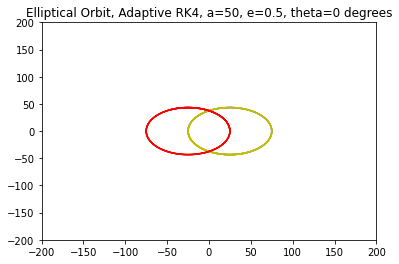

In [23]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Elliptical Orbit, Adaptive RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [24]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [25]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [26]:
def getxtheory2(theta0,ecc0,rad0,t, sgn):
    focus=getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    xtheory=sgn*focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0)
    return xtheory

In [27]:
def getytheory2(theta0, ecc0, rad0, t, sgn):
    focus = getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    ytheory=sgn*focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t)
    return ytheory



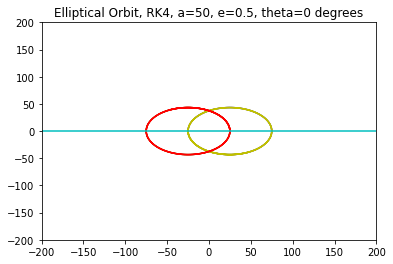

In [28]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

With adaptive step size I get inspirals!

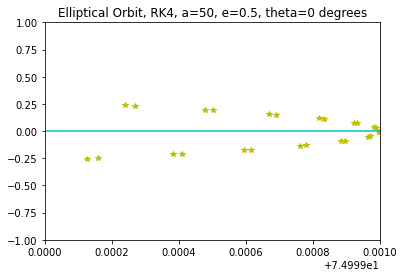

In [29]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

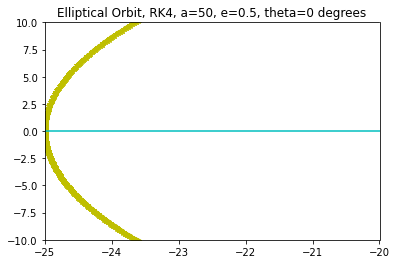

In [30]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

# Conservation of angular momentum

In [31]:
import Lstability

In [32]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

(5.743541572076577e-14, -2.041241452319263)

In [33]:
deltaL*Lavg

-1.1723955140041653e-13

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [34]:
import Estability

In [35]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

(9.936997436912439e-13, -0.005000000000022006)

In [36]:
deltaE*Eavg

-4.9684987184780866e-15

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [37]:
import orbitSymmetricTol

In [38]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [39]:
allcancelsx

1e-14

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [40]:
allcancelsa

1e-14

In [41]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.22474487e-03,  0.00000000e+00,
         4.00000000e-06, -1.22474487e-01,  0.00000000e+00],
       [-2.49999999e+01, -2.62977361e-03,  0.00000000e+00,
         8.58880462e-06, -1.22474487e-01,  0.00000000e+00],
       ...,
       [ 4.53627151e+01, -3.95476911e+01,  0.00000000e+00,
         5.36554108e-02,  2.07199803e-02,  0.00000000e+00],
       [ 4.54163445e+01, -3.95269485e+01,  0.00000000e+00,
         5.36033849e-02,  2.07652984e-02,  0.00000000e+00],
       [ 4.54699219e+01, -3.95061606e+01,  0.00000000e+00,
         5.35513671e-02,  2.08105322e-02,  0.00000000e+00]])

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [42]:
import aeTest

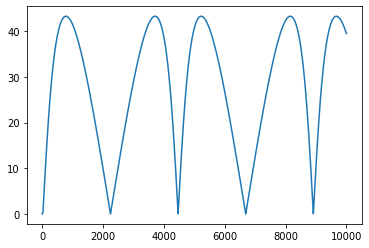

In [43]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [224]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [225]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

2239
447
1791
1.2501395868230039
4470
4470 2239
1.9964269763287181


In [226]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [227]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

(2239,
 4470,
 [74.99809141480418, -0.37833995025113354],
 [-24.99998305751479, -0.03564668537568266],
 74.99904570713737,
 25.000008471242662,
 0.499995101420715,
 49.99952708919002,
 9.797158569968545e-06,
 9.45821619964704e-06)

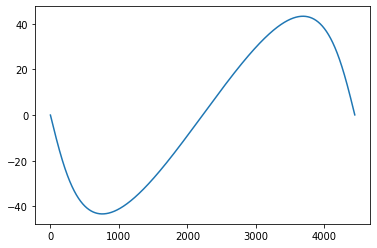

In [228]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Testing for symmetry within a given star's orbit about the line created by the initial angle with the origin that should pass thorugh the center of the ellipse, both focuses, and perihelion and aphelion

In [229]:
pivotindex=perindex
endindex = apindex
if useperihelion:
    pivotindex=apindex
    endindex=perindex

In [230]:
tosum1=list(range(0,endindex+1))
tosum2=list(range(endindex+1,pivotindex+1))

In [231]:
len(tosum1)

4471

In [232]:
len(tosum2)

0

In [233]:
apindex,perindex

(2239, 4470)

In [234]:
revtosum2=tosum2.reverse()

In [235]:
xsum=np.zeros(endindex+1)
ysum=np.zeros(endindex+1)
for index in np.arange(0,pivotindex):
    xsum[index]=npstar1x[index,0]+npstar1x[pivotindex+1-index,0]
    ysum[index]=npstar1x[index,1]+npstar1x[pivotindex+1-index,1]

In [236]:
xsum=xsum/2

In [237]:
ysum=ysum/2

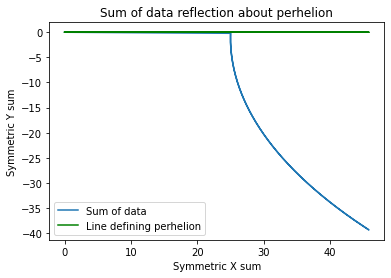

In [238]:
import matplotlib.pyplot as plt
b0=np.tan(theta0)
plt.plot(xsum,ysum,label="Sum of data")
plt.plot(xsum,b0*xsum, color="green", label="Line defining perhelion")
plt.xlabel("Symmetric X sum")
plt.ylabel("Symmetric Y sum")
plt.legend()
plt.title("Sum of data reflection about perhelion")
plt.show()

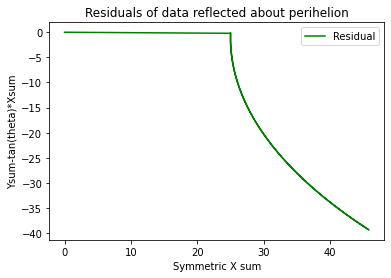

In [239]:
plt.plot(xsum,ysum-np.tan(theta0)*xsum, color="green", label="Residual")
plt.xlabel("Symmetric X sum")
plt.ylabel("Ysum-tan(theta)*Xsum")
plt.title("Residuals of data reflected about perihelion")
plt.legend()
plt.show()

The residual improves substantially from .2 at perihelion with a timestep of dt=1 to .125 at perihelion with a timestep of dt=.3 to .02 at perihelion with a timestep of dt=.1. I think timestep makes all the difference between adjacent pairs of points in resolving perihelion. I think it is difficult to tell how symmetric the orbit is by this method when the limitation is in the resolution of the orbit with timestep. Interpolation would be necessary to get a good picture of orbital shape. 

In the interest of accomplishing further orbital evolutions, I think I'm going to let the precice numerical characterization of orbital shape question go (the predicted and actual orbits overlap quite nicely) and move on to evolving parabolic and hyperbolic orbits. 

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [240]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [241]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [242]:
ellipsecenter

array([24.99905418, -0.20699332])

In [243]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [244]:
(np.array(coordap)+np.array(coordper))/2

array([24.99905418, -0.20699332])

In [245]:
getEllipsecenter(ecc0,rad0,theta0, True)

[-25.0, -0.0]

In [246]:
np.arctan2(-1.,0)/math.pi*180

-90.0

In [247]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [248]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

-3.1412939168636456

In [249]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [250]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [251]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [252]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [253]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [254]:
endindex

4470

In [255]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

4469
[50.         49.99999998 49.99999991 ... 49.99724887 49.99853236
 49.99941591] [ 0.          0.00122474  0.00262977 ... -0.45423459 -0.33177028
 -0.20930065] [0.00000000e+00 1.40345424e-03 3.01349858e-03 ... 3.59479471e+02
 3.59619814e+02 3.59760158e+02]
Eang [0.00000000e+00 2.44948974e-05 5.25954722e-05 ... 6.27410037e+00
 6.27654980e+00 6.27899927e+00]


In [256]:
nptimesoneorbit=nptimes[0:endindex-1]

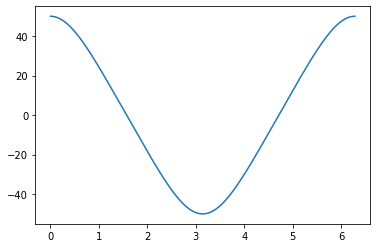

In [257]:
plt.plot(Eang0, xE0)

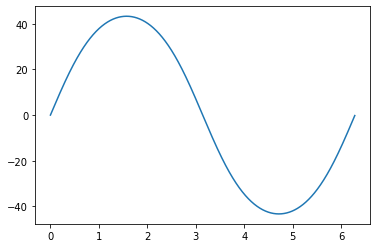

In [258]:
plt.plot(Eang0, yE0)

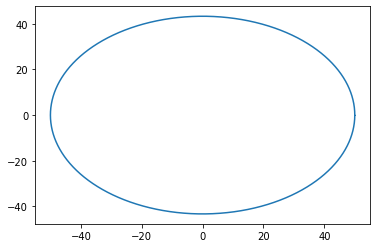

In [259]:
plt.plot(xE0,yE0)

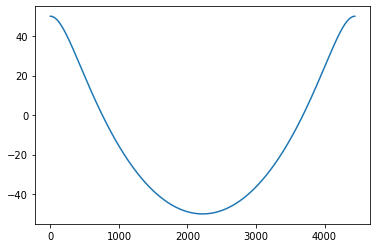

In [260]:
plt.plot(nptimesoneorbit,xE0)

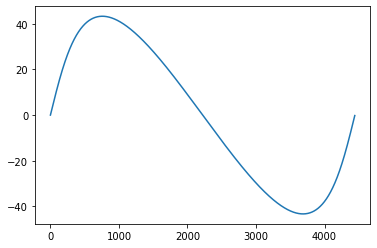

In [261]:
plt.plot(nptimesoneorbit,yE0)

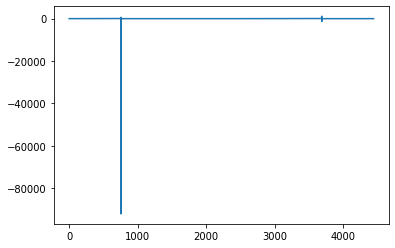

In [262]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [263]:
np.arctan(0./1.)

0.0

In [264]:
yE0[0]

0.0

In [265]:
xE0[0]

50.0

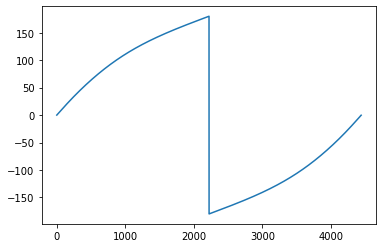

In [266]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [267]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

4469
[50.         49.99999998 49.99999991 ... 49.99724887 49.99853236
 49.99941591] [ 0.          0.00122474  0.00262977 ... -0.45423459 -0.33177028
 -0.20930065] [0.00000000e+00 1.40345424e-03 3.01349858e-03 ... 3.59479471e+02
 3.59619814e+02 3.59760158e+02]
Eang [0.00000000e+00 2.44948974e-05 5.25954722e-05 ... 6.27410037e+00
 6.27654980e+00 6.27899927e+00]
[0.00000000e+00 2.44948974e-05 5.25954722e-05 ... 6.27410037e+00
 6.27654980e+00 6.27899927e+00] 0.5 50 1.0 [0.00000000e+00 8.66025404e-03 1.85953075e-02 ... 4.43967088e+03
 4.44053692e+03 4.44140295e+03]


In [268]:
np.max(Eangtest)

4441.402946096527

In [269]:
nptimes[0]

0.0

In [270]:
nptimesoneorbit=nptimes[0:endindex-1]

In [271]:
tpredoneorbit=Eangtest[0:endindex-1]

In [272]:
Eangoneorbit=Eang0[0:endindex-1]

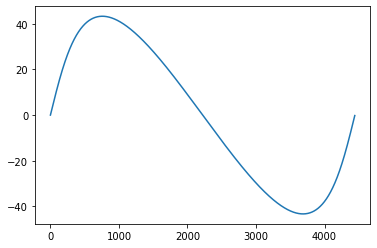

In [273]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

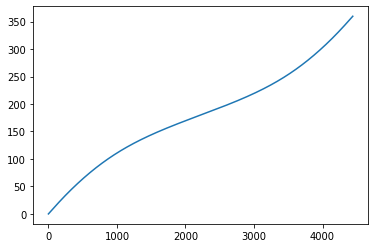

In [274]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

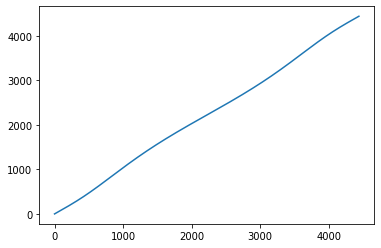

In [275]:
plt.plot(nptimesoneorbit,tpredoneorbit)

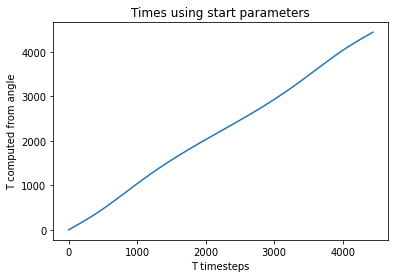

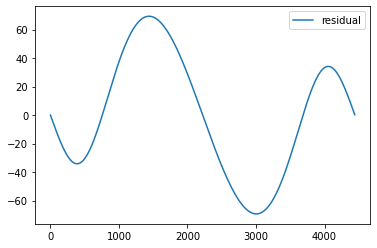

In [276]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


# THERE IS A SECOND HARMONIC IN THIS TIMING DATA!!! I have heard of orbital resonances. Is that what I am seeing?

In [277]:
from matplotlib import pyplot as plt

Arctan function is giving tangent output. I'm done for today. I'm asking for help on this, either Steve or on a forum. Clearly something really weird is going on. This is a distinct problem from the retrograde motion I had before I fixed the center, which you can tell from the sharply spiked top as opposed to the curved top I had before. Now the center appears to be in the correct location but there is some problem related to tangent versus arctangent. 

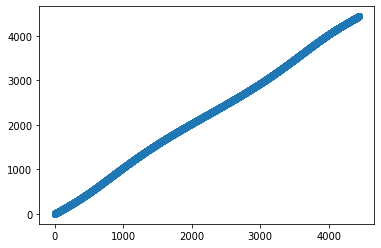

In [278]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

Retrograde motion as seen from the center of mass. I'm not sure that makes sense. So there's a problem with the definition of the Eang. The problem might be with the ellipse center, which probably shouldn't be at x=-70, if it spans between +5 and -95. 

In [279]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

4469
[50.         49.99999998 49.99999991 ... 49.99724887 49.99853236
 49.99941591] [ 0.          0.00122474  0.00262977 ... -0.45423459 -0.33177028
 -0.20930065] [0.00000000e+00 1.40345424e-03 3.01349858e-03 ... 3.59479471e+02
 3.59619814e+02 3.59760158e+02]
Eang [0.00000000e+00 2.44948974e-05 5.25954722e-05 ... 6.27410037e+00
 6.27654980e+00 6.27899927e+00]
[0.00000000e+00 2.44948974e-05 5.25954722e-05 ... 6.27410037e+00
 6.27654980e+00 6.27899927e+00] <Parameter 'ecc', value=0.5, bounds=[0:1.0]> <Parameter 'rad', value=50.0, bounds=[0:inf]> <Parameter 'mass', value=1.0 (fixed), bounds=[-inf:inf]> [0.00000000e+00 8.66025404e-03 1.85953075e-02 ... 4.43967088e+03
 4.44053692e+03 4.44140295e+03]
4469
[50.         49.99999998 49.99999991 ... 49.99724887 49.99853236
 49.99941591] [ 0.          0.00122474  0.00262977 ... -0.45423459 -0.33177028
 -0.20930065] [0.00000000e+00 1.40345424e-03 3.01349858e-03 ... 3.59479471e+02
 3.59619814e+02 3.59760158e+02]
Eang [0.00000000e+00 2.44948974e-05 

In [280]:
outt

Eccentricity fit is still not great for eccentricity of 0.9 (0.99), but radius fit is pretty good. The chi square is enormous. Eccentricity of 0.5 looks somewhat better (ecc 0.51) but still has a large chisquared and generates a potentially helpful divide by zero warning in the fit. 

In [281]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

4441.173992160432

Updated Jupyter and python packages and angular momentum and energy conservation improved by many orders of magnitude, but the fit is about the same. deltaL and deltaE are now consistent with roundoff error. 

In [282]:
from scipy.fft import fft

In [283]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [284]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [285]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

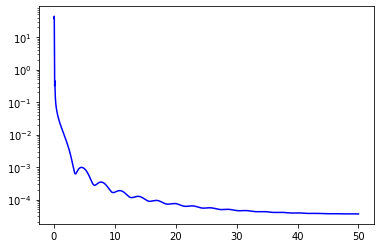

In [286]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [287]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

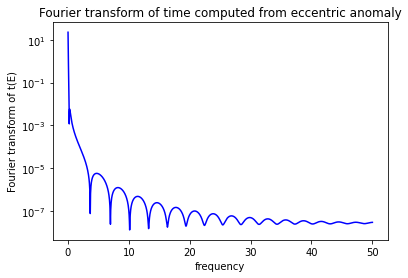

In [299]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

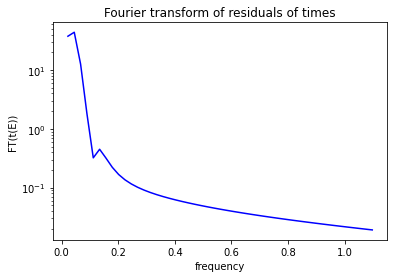

In [298]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

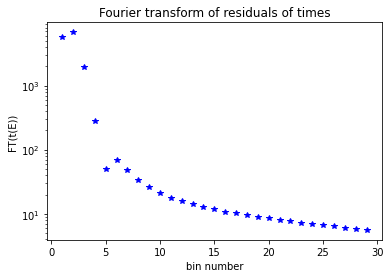

In [300]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5